## Telecom Churn Case Study
1. In this Case study we need to predict whether a particular customer will switch to another telecom provider or not. 

2. In telecom terminology, this is referred to as churning and not churning, respectively.

1. Importing Required Libraries

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

2. Reading The data

In [2]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

3. Merge the Datasets based on Customer ID

In [3]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [4]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [5]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [7]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00


In [338]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

While deling with Categorical variables we have several ways to map them as Numeric
assume that I have 2 varibles 1. Churn (Yes,No) 2. Education(No education, High School, Graduate, Post Graduate)
1. Mapping
2. One-Hot Encoding (it creates those many number of variables as the responses)
3. Dummy Variable creation (it creates number of variables as the responses-1)
4. Label Encoding

6. Dummy Variable Creation

In [339]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

In [340]:
# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

 7. Dropping the repeated variables

In [341]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

8. Cnverting the string Variable to Numeric as per the data definition

In [342]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] =pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [343]:
telecom.head(10)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,9305-CDSKC,8,1,1,99.65,820.50,1,0,0,0,...,1,0,0,1,1,0,0,1,0,1
6,1452-KIOVK,22,1,1,89.10,1949.40,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0
7,6713-OKOMC,10,0,0,29.75,301.90,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
8,7892-POOKP,28,1,1,104.80,3046.05,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
9,6388-TABGU,62,1,0,56.15,3487.95,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0


In [344]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

9. Checking for Outliers

In [345]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [346]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

10. Checking for Missing Values and deal with the missing Values

In [347]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [348]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [349]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [350]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

11. Feature Standardisation

In [351]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [352]:
normalized_df=(df-df.mean())/df.std()

In [353]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [354]:
telecom = pd.concat([telecom,normalized_df],axis=1)

In [355]:
telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033


12. Checking the Churn Rate

Wenever we are creating a model, we expect the data to be balanced.
imbalanced class distribution. 
This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes.
This problem is predominant in scenarios where anomaly detection is crucial like electricity pilferage, fraudulent transactions in banks, identification of rare diseases, etc. In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate.

1. Synthetic Minority Over-sampling Technique
2. Under sampling
3. Over sampling
4. Modified synthetic minority oversampling technique (MSMOTE)

In [356]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [357]:
churn

26.578498293515356

We have almost 27% churn rate

13. Splitting our data into a training set and a test set.

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [360]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [361]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

14. Build the Base Model

In [362]:
import statsmodels.api as sm

In [363]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

15. Check the summary

In [364]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 09 Mar 2021   Deviance:                       4009.4
Time:                        05:38:12   Pearson chi2:                 6.07e+03
No. Iterations:                    18                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
Streaming

16. Create the correlation Matrix and Heatmap

In [365]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

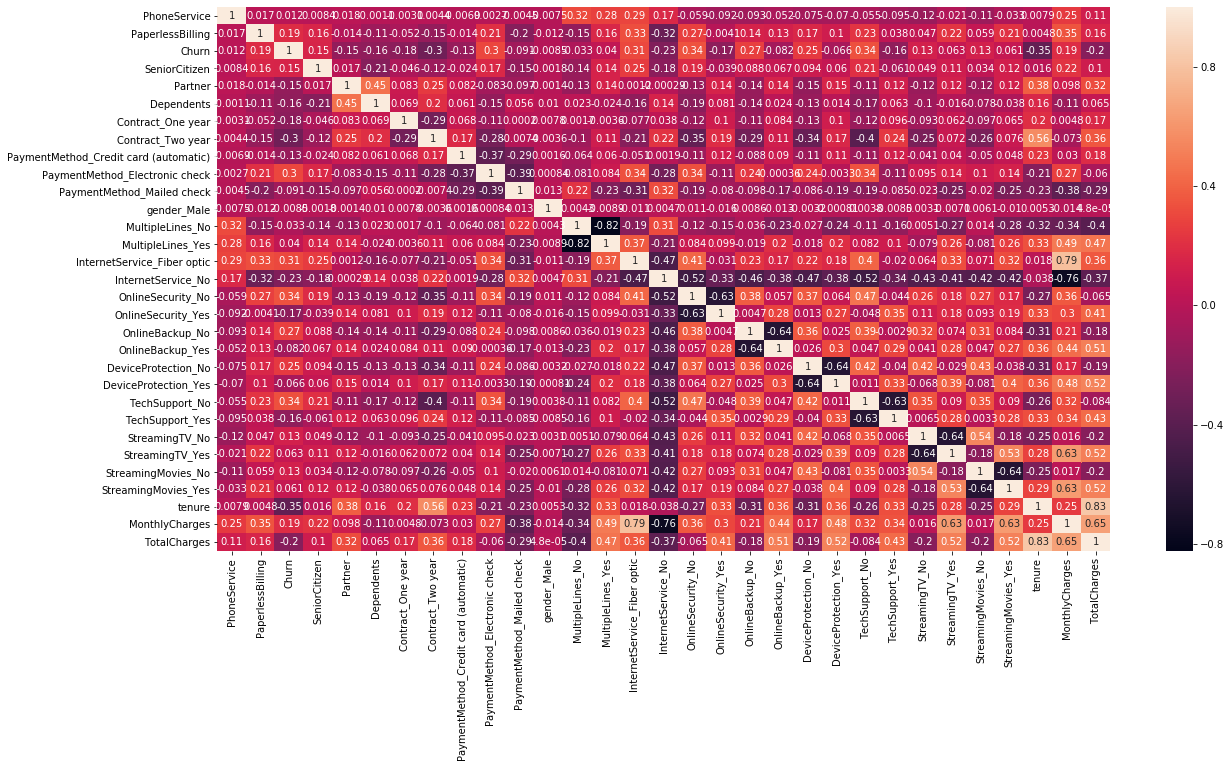

In [366]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

In [367]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

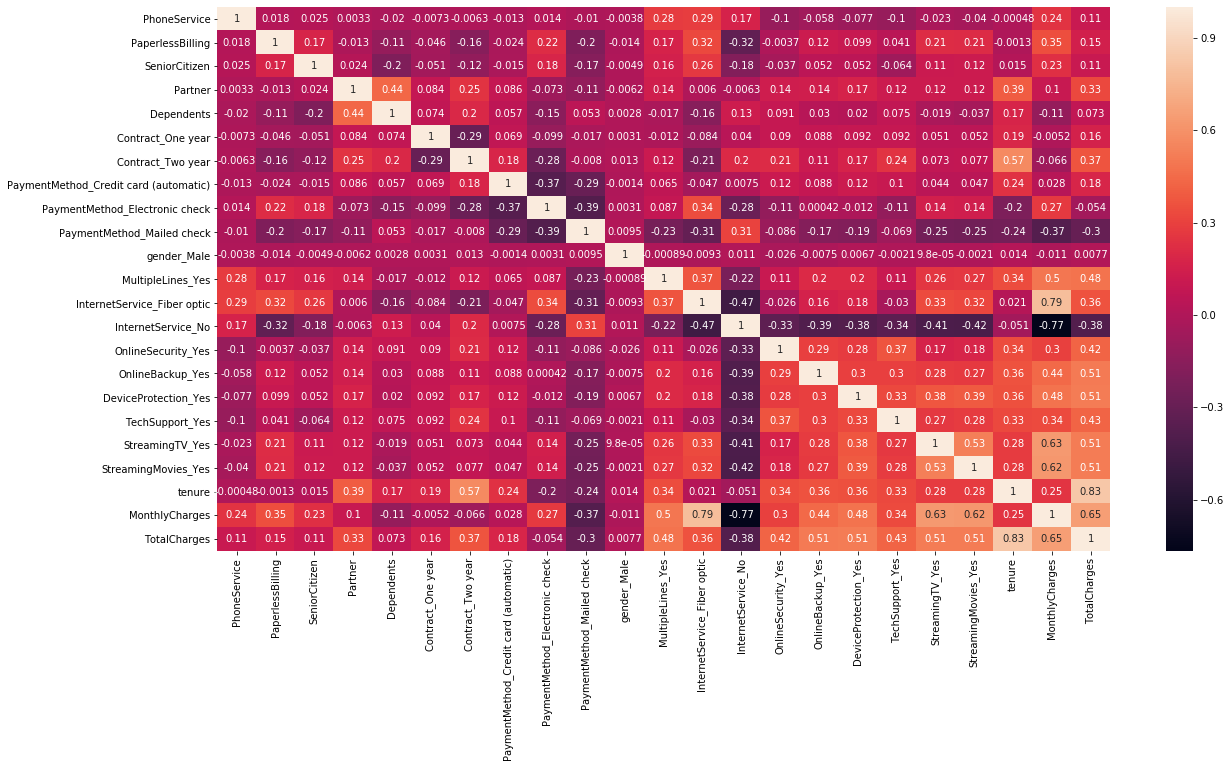

In [368]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

18. Re-Run the Model

Now let's run our model again after dropping highly correlated variables

In [369]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 09 Mar 2021   Deviance:                       4009.4
Time:                        05:38:23   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

19. Perform Feature Selection Using RFE

In [370]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[False  True False False False  True  True False  True False False  True
 False  True  True  True False False False False False False False False
  True False  True  True  True  True]
[ 5  1  3 18  4  1  1 11  1 12 17  1 16  1  1  1  7  6 15  9 10  2  8 14
  1 13  1  1  1  1]


In [371]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

20. Build the Logistic Regression Model with selected varaibles

In [372]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [373]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.2
Date:                Tue, 09 Mar 2021   Deviance:                       4048.4
Time:                        05:38:24   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0162      0.169     -6.017      0.000      -1.347      -0.685
PhoneService                      -0.3090      0.173     -1.784      0.074      -0.648       0.030
PaperlessBilling                   0.3595      0.089      4.029      0.000       0.185       0.534
Contract_One year                 -0.7012      0.127     -5.516      0.000      -0.950      -0.452
Contract_Two year                 -1.3187      0.210     -6.271      0.000      -1.731      -0.907
PaymentMethod_Electronic check     0.3668      0.083      4.446      0.000       0.205       0.529
MultipleLines_No                  -0.2311      0.095     -2.435      0.015      -0.417      -0.045
InternetService_Fiber optic        0.7937      0.116      6.836      0.000       0.566       1.021
InternetService_No                -1.1832      0.182     -6.484      0.000      -1.541      -0.826
OnlineSecurity_Yes                -0.4107      0.102     -4.031      0.000      -0.610      -0.211
TechSupport_Yes                   -0.4181      0.101     -4.135      0.000      -0.616      -0.220
StreamingMovies_No                -0.2024      0.094     -2.160      0.031      -0.386      -0.019
tenure                            -1.4974      0.181     -8.251      0.000      -1.853      -1.142
TotalCharges                       0.7373      0.186      3.965      0.000       0.373       1.102
==================================================================================================
"""

21. Check the VIF Values

In [374]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

22. Drop the variables withHigh VIF

In [375]:
telecom.columns
['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

['PhoneService',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingMovies_No',
 'tenure',
 'TotalCharges']

In [376]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
0,PhoneService,10.87
12,TotalCharges,8.58
11,tenure,6.80
1,PaperlessBilling,2.61
7,InternetService_No,0.65
3,Contract_Two year,0.28
2,Contract_One year,0.24
9,TechSupport_Yes,0.24
8,OnlineSecurity_Yes,0.21
10,StreamingMovies_No,0.19


### Dropping Variable with high VIF

In [377]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [378]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Tue, 09 Mar 2021   Deviance:                       4051.5
Time:                        05:38:26   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1915      0.138     -8.607      0.000      -1.463      -0.920
PaperlessBilling                   0.3563      0.089      3.998      0.000       0.182       0.531
Contract_One year                 -0.6965      0.127     -5.483      0.000      -0.945      -0.448
Contract_Two year                 -1.3078      0.210     -6.230      0.000      -1.719      -0.896
PaymentMethod_Electronic check     0.3700      0.082      4.487      0.000       0.208       0.532
MultipleLines_No                  -0.2990      0.087     -3.442      0.001      -0.469      -0.129
InternetService_Fiber optic        0.7227      0.108      6.666      0.000       0.510       0.935
InternetService_No                -1.2732      0.175     -7.276      0.000      -1.616      -0.930
OnlineSecurity_Yes                -0.4100      0.102     -4.025      0.000      -0.610      -0.210
TechSupport_Yes                   -0.4202      0.101     -4.157      0.000      -0.618      -0.222
StreamingMovies_No                -0.2205      0.093     -2.366      0.018      -0.403      -0.038
tenure                            -1.4276      0.177     -8.066      0.000      -1.774      -1.081
TotalCharges                       0.6495      0.179      3.622      0.000       0.298       1.001
==================================================================================================
"""

In [379]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
11,TotalCharges,8.24
10,tenure,6.56
0,PaperlessBilling,2.44
6,InternetService_No,0.45
2,Contract_Two year,0.26
8,TechSupport_Yes,0.24
1,Contract_One year,0.23
7,OnlineSecurity_Yes,0.21
9,StreamingMovies_No,0.17
3,PaymentMethod_Electronic check,0.05


In [380]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

23. Find out the predicted Probabilites

In [381]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [382]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [383]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [384]:
# Let's see the head
y_pred_1.head()

,1
0,0.497860
1,0.370391
2,0.006723
3,0.636464
4,0.007508


In [385]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [386]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [387]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [388]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [389]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [390]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [391]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.497860
1,3730,1,0.370391
2,1761,0,0.006723
3,2283,1,0.636464
4,1872,0,0.007508


24. Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0

In [392]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [393]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.497860,0
1,3730,1,0.370391,0
2,1761,0,0.006723,0
3,2283,1,0.636464,1
4,1872,0,0.007508,0


### Model Evaluation

25. Find out the Accuracy, Sensitivity and Specificity

In [394]:
from sklearn import metrics

In [395]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [396]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1360,  168],
       [ 249,  333]], dtype=int64)

In [397]:
# Predicted     not_churn    churn
# Actual
# not_churn        1326      166
# churn            249       333  

In [398]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.8023696682464455

In [399]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [400]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5721649484536082

In [401]:
# Let us calculate specificity
TN / float(TN+FP)

0.8900523560209425

In [402]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1099476439790576


In [403]:
# positive predictive value 
print (TP / float(TP+FP))

0.6646706586826348


In [404]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8452454940957116


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [405]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

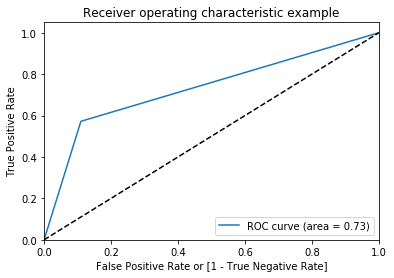

(array([0.        , 0.10994764, 1.        ]),
 array([0.        , 0.57216495, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [406]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [407]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.497860,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.370391,0,1,1,1,1,0,0,0,0,0,0
2,1761,0,0.006723,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.636464,1,1,1,1,1,1,1,1,0,0,0
4,1872,0,0.007508,0,1,0,0,0,0,0,0,0,0,0


In [408]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.605687  0.477094  0.943299
0.2   0.2  0.695261  0.643979  0.829897
0.3   0.3  0.751659  0.754581  0.743986
0.4   0.4  0.783412  0.827880  0.666667
0.5   0.5  0.802370  0.890052  0.572165
0.6   0.6  0.794787  0.941754  0.408935
0.7   0.7  0.757820  0.979058  0.176976
0.8   0.8  0.727962  1.000000  0.013746
0.9   0.9  0.724171  1.000000  0.000000


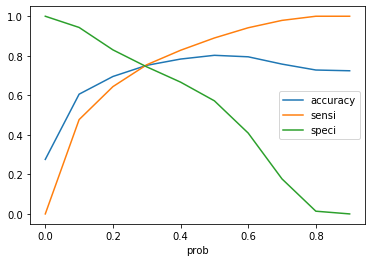

In [409]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

28. Find the Over all metrics based on the Optimal Cut-off

In [410]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [411]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.497860,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.370391,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.006723,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.636464,1,1,1,1,1,1,1,1,0,0,0,1
4,1872,0,0.007508,0,1,0,0,0,0,0,0,0,0,0,0


In [412]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7516587677725118

29. Import PCA

In [413]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

30. Perform PCA on Training Data

In [414]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

31. Print the Principal Components

In [415]:
pca.components_

array([[ 1.76113503e-02,  6.73236050e-02,  3.33558780e-02,
         9.81025382e-02,  1.45144894e-02,  2.99711219e-02,
         8.03474721e-02,  4.45137169e-02,  1.03838839e-02,
        -9.64778216e-02,  5.46455027e-04, -1.44992416e-01,
         1.62603767e-01,  1.38408762e-01, -1.23559445e-01,
         1.07552300e-02,  1.12804215e-01, -2.93144081e-02,
         1.52873853e-01, -3.66586107e-02,  1.60218056e-01,
         2.26069096e-03,  1.21298754e-01, -5.19779044e-02,
         1.75537350e-01, -5.32208106e-02,  1.76780256e-01,
         4.50041974e-01,  4.64768058e-01,  5.64467383e-01],
       [-1.58225213e-02, -1.51382114e-01, -7.60391859e-02,
         1.10808074e-01,  1.15262476e-01,  5.70934546e-02,
         1.99196237e-01,  6.98211144e-02, -1.94953309e-01,
         7.22696236e-02,  6.84716202e-03,  3.64391587e-02,
        -5.22616800e-02, -2.53405153e-01,  2.28888352e-01,
        -2.80064773e-01,  5.11764215e-02, -2.29155531e-01,
         2.67178910e-04, -2.30417558e-01,  1.52920583e-

In [416]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.017611,-0.015823,PhoneService
1,0.067324,-0.151382,PaperlessBilling
2,0.033356,-0.076039,SeniorCitizen
3,0.098103,0.110808,Partner
4,0.014514,0.115262,Dependents


In [417]:
pca.explained_variance_ratio_

array([3.27847827e-01, 1.75765007e-01, 6.03450801e-02, 4.55648825e-02,
       3.71944481e-02, 3.44939196e-02, 3.21953215e-02, 3.12085042e-02,
       3.00721929e-02, 2.81455178e-02, 2.67941203e-02, 2.51671298e-02,
       2.45802775e-02, 2.36931522e-02, 2.27788300e-02, 2.10982912e-02,
       1.53183204e-02, 1.12792045e-02, 8.45904722e-03, 7.12080502e-03,
       5.92788522e-03, 4.90401247e-03, 4.62235942e-05, 2.05310042e-33,
       2.05310042e-33, 2.05310042e-33, 2.05310042e-33, 2.05310042e-33,
       2.05310042e-33, 2.65622190e-36])

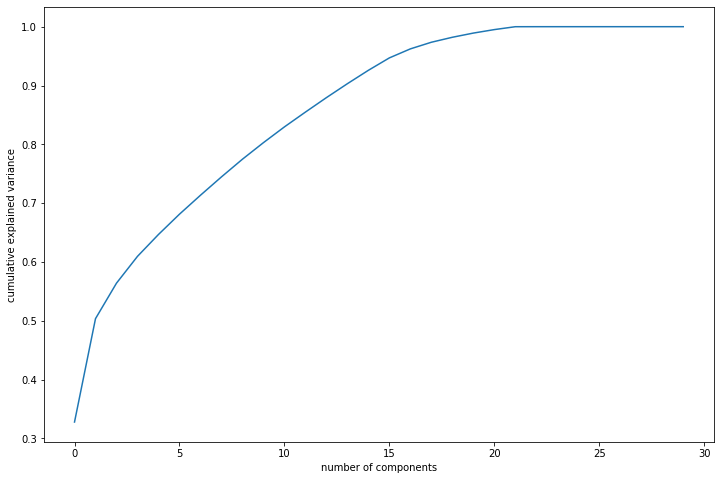

In [418]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [419]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

In [420]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(4922, 16)

32. Check the correlation among the PCs to make sure that these are not correlated

In [421]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

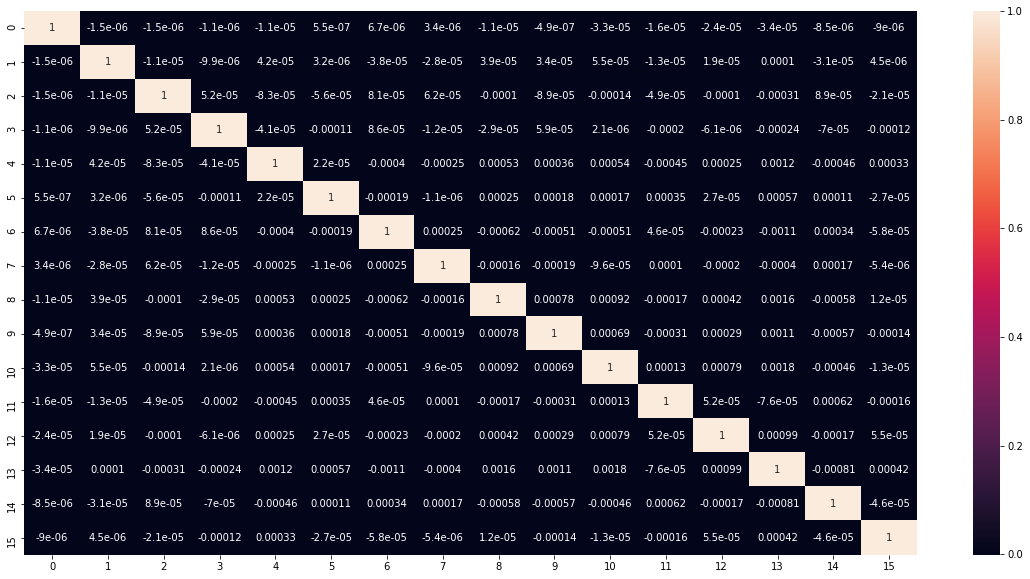

In [423]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [424]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.001816526219203132 , min corr:  -0.0010751691903677237


In [425]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2110, 16)

Applying a logistic regression on our Principal Components:
    
We expect to get similar model performance with significantly lower features

If we can do so, we would have done effective dimensionality reduction without losing any import information

In [426]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

Note

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is linear, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear.

In [427]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.83'

Impressive! The same result, without all the hard work on feature selection!

Why not take it a step further and get a little more 'unsupervised' in our approach? This time, we'll let PCA select the number of components basen on a variance cutoff we provide

33. Select different number of PCs by changing the Cumulative explained Variance Ratio

In [428]:
pca_again = PCA(0.90)

In [429]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 14 components

(4922, 14)

In [430]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [431]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(2110, 14)

In [432]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'

Before closing, let's also visualize the data to see if we can spot any patterns

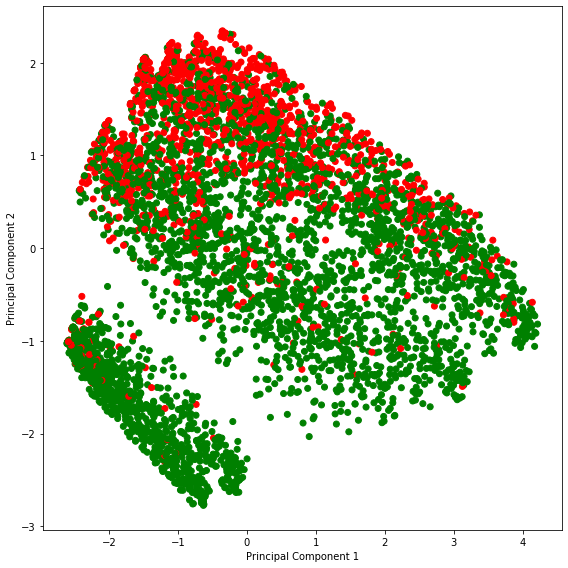

In [433]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Looks like there is a good amount of separation in 2D, but probably not enough

Let's look at it in 3D, and we expect spread to be better (dimensions of variance, remember?)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))

34. So, let's try building the model with just 3 principal components

In [435]:
pca_last = PCA(n_components=3)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(2110, 3)

In [436]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.82'